# Exploratory Data Analysis (EDA)
 

In [1]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Download the data
data_files = ['../data/Euronews.csv', '../data/KyivPost.csv']
# Concatenate and create a Data Frame
df = pd.concat((pd.read_csv(filename) for filename in data_files))
df = df.reset_index(drop=True)

In [ ]:
# Check the Data Frame
df.head(5)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1040 non-null   object 
 1   date_str   1040 non-null   object 
 2   siteName   1040 non-null   object 
 3   text       1040 non-null   object 
 4   sentiment  1040 non-null   float64
 5   pageUrl    1040 non-null   object 
 6   author     1040 non-null   object 
dtypes: float64(1), object(6)
memory usage: 57.0+ KB


In [144]:
# Count the distribution of articles among newspapers 
df['siteName'].value_counts()

siteName
euronews    562
KyivPost    478
Name: count, dtype: int64

In [145]:
# Visualize three samples of random texts from a dataset printing their publication dates and the headline text
for idx in df.sample(3).index:
    text = df.iloc[idx]
    print("Text #{}:".format(idx))
    print("Publication date: {}".format(text.date_str))
    print("Title: {}\n".format(text.title))

Text #924:
Publication date: d2022-09-23T10:17
Title: Zelensky Blames Russia As World Vows Response To Food Shortages

Text #563:
Publication date: d2023-06-24T09:41
Title: OPINION: Yermak Critic Spartz Passionate About FBI Collusion and Russian Disinformation

Text #372:
Publication date: d2022-09-03T00:00
Title: EU steps up humanitarian aid to Ukraine, expects millions more refugees



In [ ]:
# Maximum +ve sentiment of an article in Euronews
df.loc[df[df['siteName']== 'euronews']['sentiment'].idxmax()]#['text']

In [ ]:
# Maximum +ve sentiment of an article in KyivPost
df.loc[df[df['siteName']== 'KyivPost']['sentiment'].idxmax()]#['text']

In [ ]:
# Maximum -ve sentiment of an article in Euronews
df.loc[df[df['siteName']== 'euronews']['sentiment'].idxmin()]#['text']

In [ ]:
# Maximum -ve sentiment of an article in KyivPost
df.loc[df[df['siteName']== 'KyivPost']['sentiment'].idxmin()]#['text']

In [150]:
# The count of words in the longest text
print("The longest text in KyivPost has: {} words".format(df[df['siteName']== 'KyivPost']["text"].apply(lambda x : len(x.split())).max()))
print("The longest text in Euronews has: {} words".format(df[df['siteName']== 'euronews']["text"].apply(lambda x : len(x.split())).max()))

# The count of words in the shortest text
print("The shortest text in KyivPost has: {} words".format(df[df['siteName']== 'KyivPost']["text"].apply(lambda x : len(x.split())).min()))
print("The shortest text in Euronews has: {} words".format(df[df['siteName']== 'euronews']["text"].apply(lambda x : len(x.split())).min()))

The longest text in KyivPost has: 4146 words
The longest text in Euronews has: 3050 words
The shortest text in KyivPost has: 90 words
The shortest text in Euronews has: 46 words


### Visualization

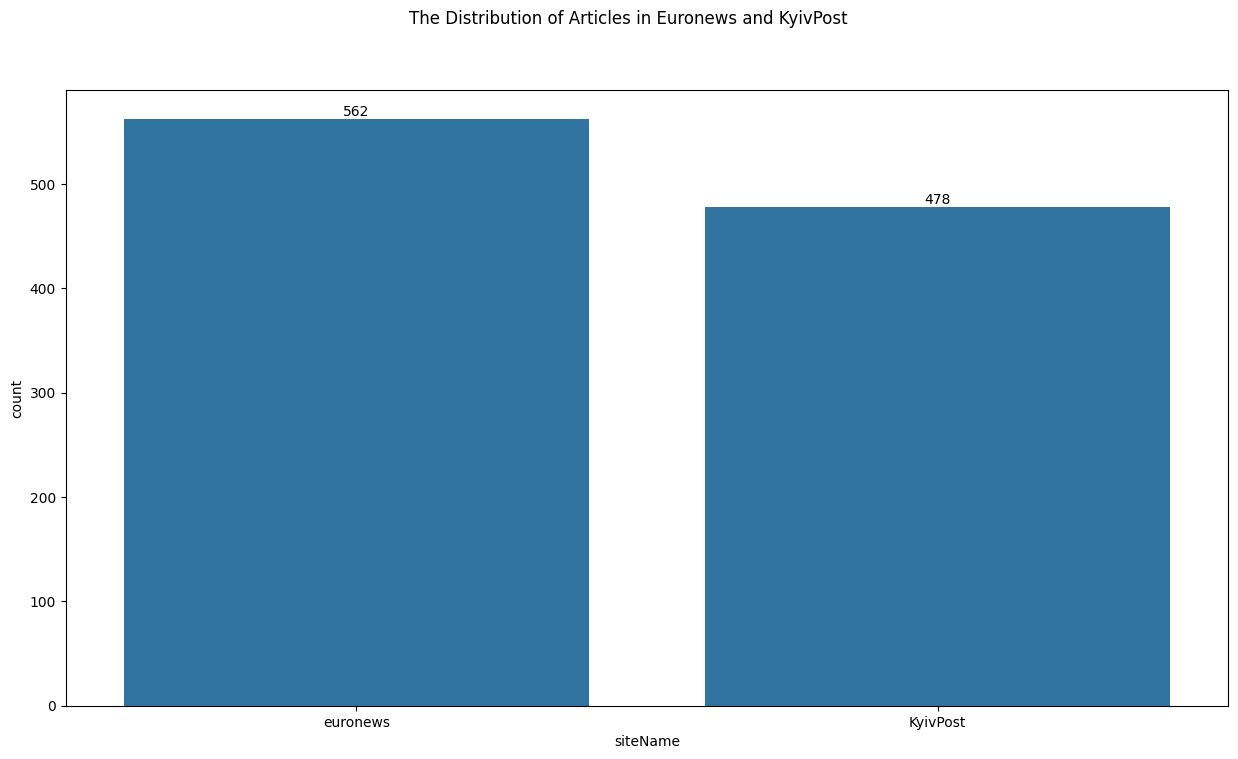

In [151]:
# Check for a data balance
fig, axs = plt.subplots(figsize=(15,8))
fig.suptitle("The Distribution of Articles in Euronews and KyivPost")
axs=sns.countplot(data=df, x='siteName', stat='count')
axs.bar_label(axs.containers[0])

plt.show()

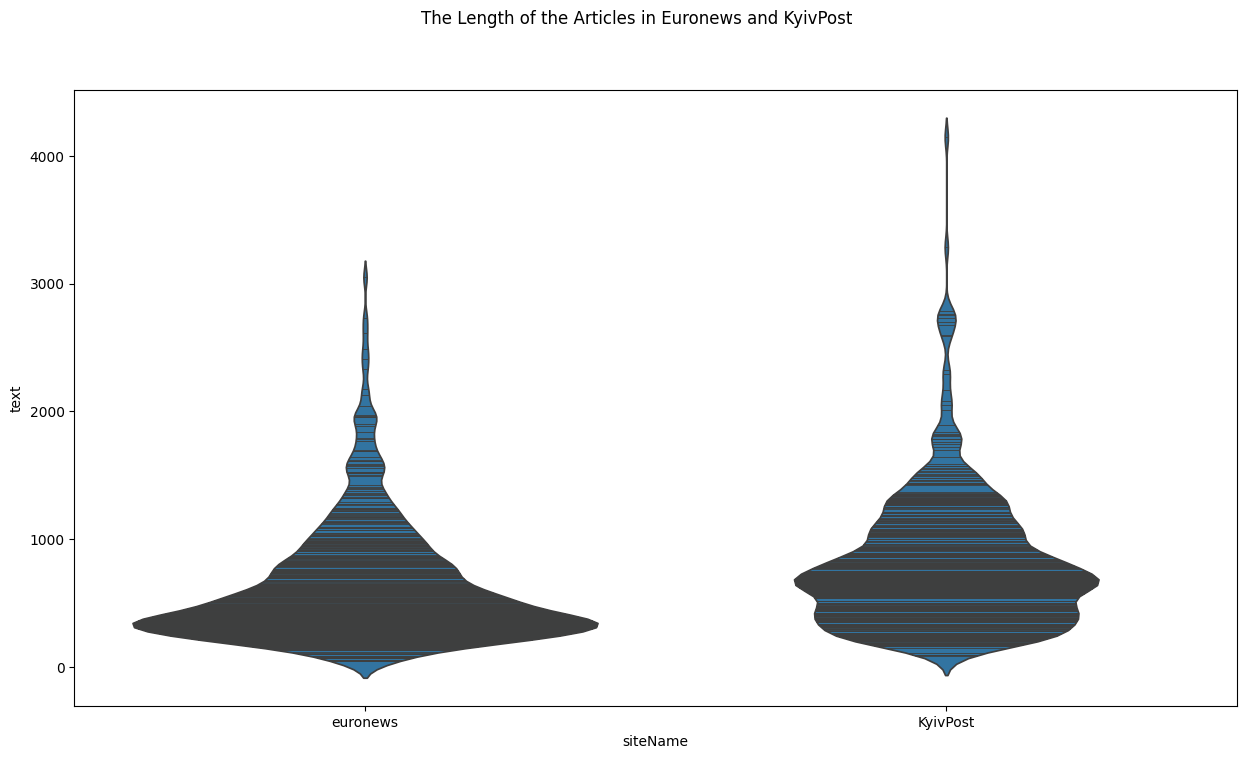

In [152]:
# Visualize data balance
fig, axs = plt.subplots(figsize=(15,8))
fig.suptitle("The Length of the Articles in Euronews and KyivPost")
axs=sns.violinplot( x=df['siteName'], y=df["text"].apply(lambda x : len(x.split())), bw_adjust=.5, inner="stick")

plt.show()

In [ ]:
# Calculate length (word count) for each text
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Find the maximum word count
max_words = df['word_count'].max()

# Filter rows where word count == max_words, get first occurrence
longest_text = df.loc[df['word_count'] == max_words, 'text'].iloc[0]

print(f"The longest text ({max_words} words) is:\n{longest_text}")

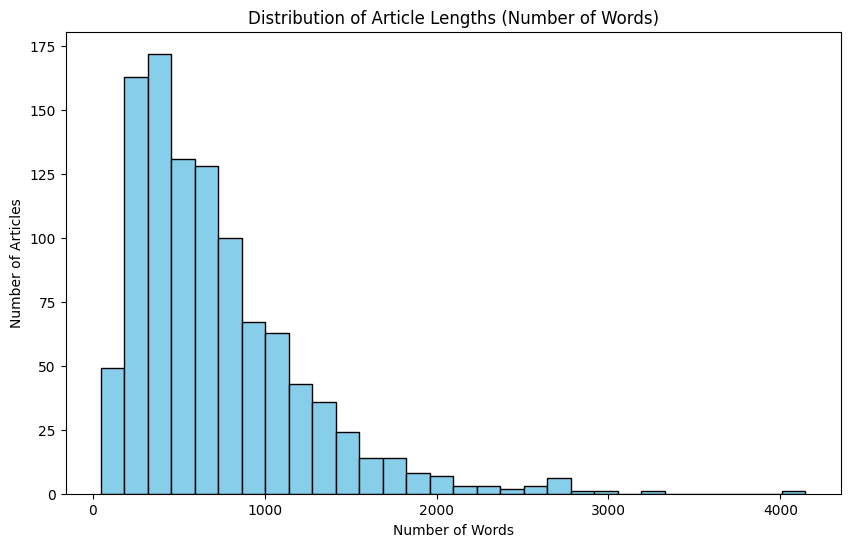

In [154]:
plt.figure(figsize=(10,6))
plt.hist(df['word_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Article Lengths (Number of Words)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Articles')
plt.show()

In [ ]:
df.head(10)

In [156]:
# Group by sitename and calculate the mean of word_count
site_means = df.groupby('siteName')['word_count'].mean()

print("Average word count per site:")
print(site_means)

Average word count per site:
siteName
KyivPost    809.391213
euronews    631.056940
Name: word_count, dtype: float64


In [157]:
# Check the tiemstamp format
print(df[df['siteName'] == 'KyivPost']['date_str'].iloc[0])
print(df[df['siteName'] == 'euronews']['date_str'].iloc[0])

d2023-06-24T10:46
d2023-06-23T12:34:22


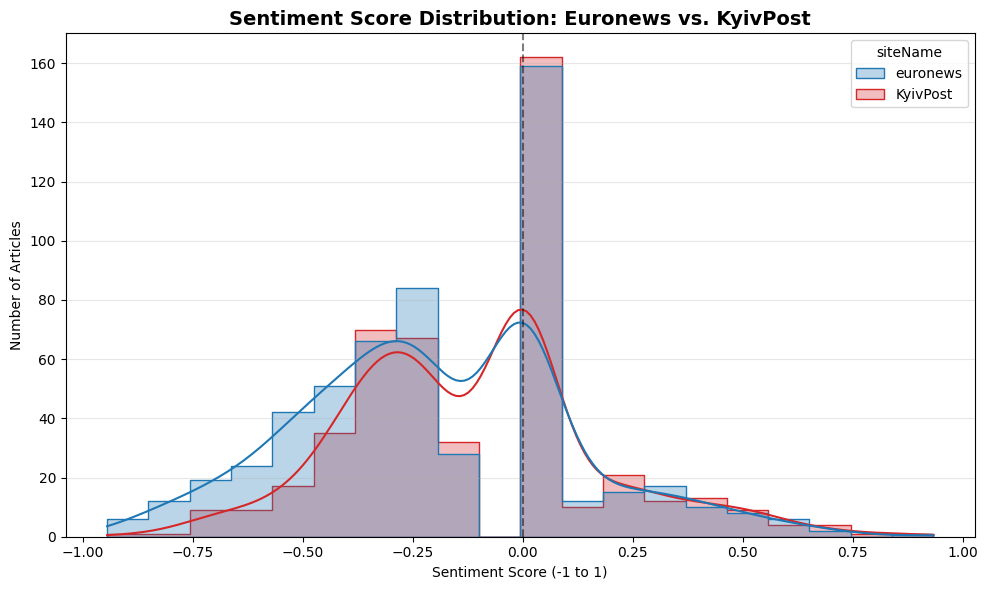

In [ ]:
# Q: What is the distribution of sentiment scores per journal?

# Create the figure
plt.figure(figsize=(10, 6))

# 2. Plot with hue to separate by siteName
sns.histplot(
    data=df, 
    x='sentiment', 
    hue='siteName', 
    bins=20, 
    kde=True, 
    element='step',     
    palette=['#1f77b4', '#d62728'], 
    alpha=0.3           
)

# Add a vertical line at 0 for "Neutral"
plt.axvline(0, color='black', linestyle='--', alpha=0.5)

# Aesthetics
plt.title('Sentiment Score Distribution: Euronews vs. KyivPost', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Score (-1 to 1)')
plt.ylabel('Number of Articles')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [163]:
# Print descriptive stats
print(df['sentiment'].describe())

count    1040.000000
mean       -0.157486
std         0.300636
min        -0.945000
25%        -0.356250
50%        -0.188000
75%         0.000000
max         0.933000
Name: sentiment, dtype: float64


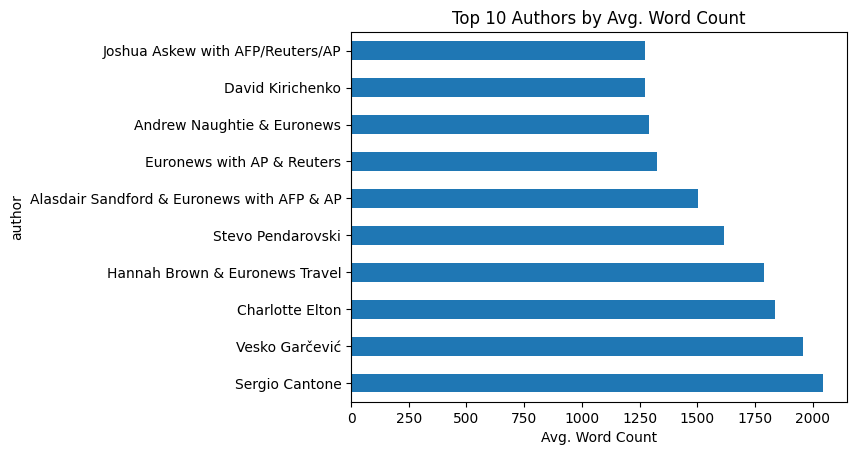

In [ ]:
# Q: Do certain authors tend to write longer articles?
author_wordcount = df[df['siteName'] == 'euronews'].groupby('author')['word_count'].mean().sort_values(ascending=False).head(10)
author_wordcount.plot(kind='barh', title='Top 10 Authors at Euronews by Average Word Count')
plt.xlabel('Avg. Word Count')
plt.show()

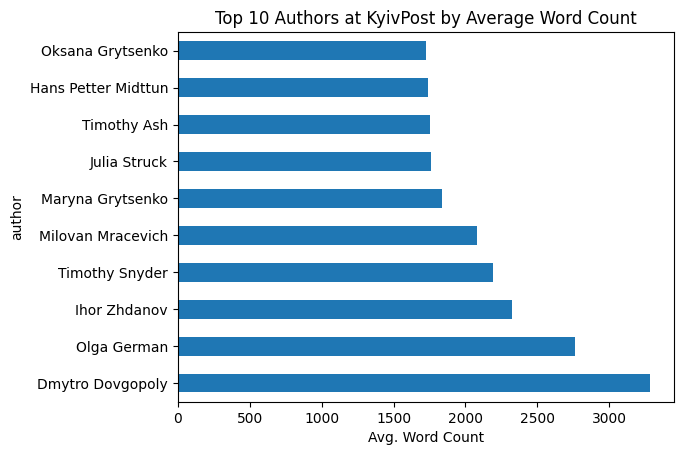

In [184]:
# Q: Do certain authors tend to write longer articles per journal?
author_wordcount = df[df['siteName'] == 'KyivPost'].groupby('author')['word_count'].mean().sort_values(ascending=False).head(10)
author_wordcount.plot(kind='barh', title='Top 10 Authors at KyivPost by Average Word Count')
plt.xlabel('Avg. Word Count')
plt.show()

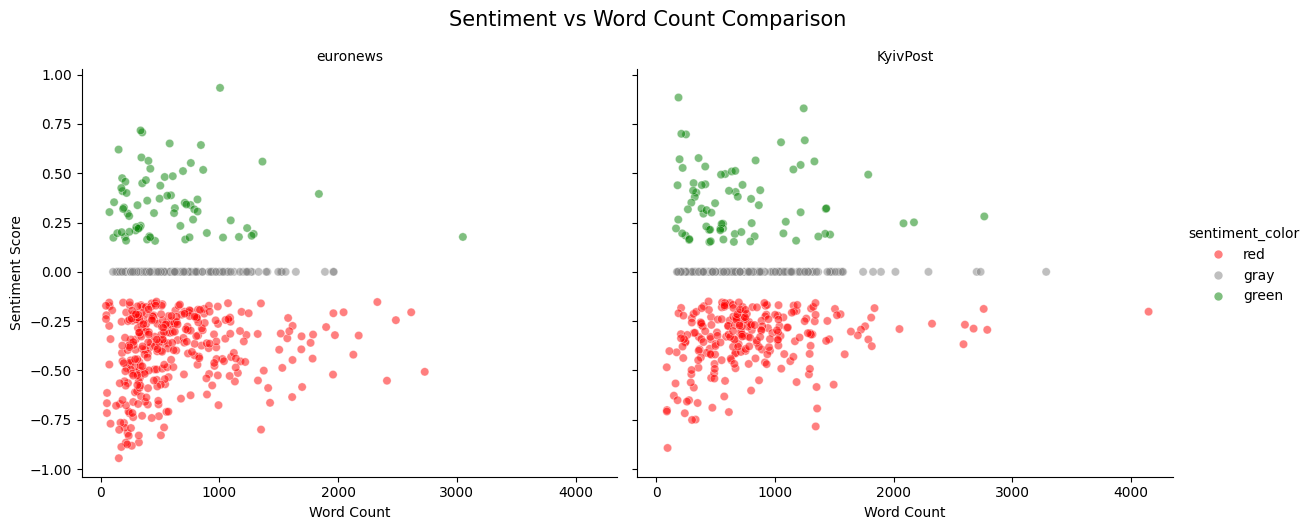

In [189]:
# Q: What’s the relationship between sentiment and article length?

# Prepare data
df = df.copy()
df['sentiment_color'] = np.where(
    df['sentiment'] > 0, 'green',
    np.where(df['sentiment'] < 0, 'red', 'gray')
)
palette = {'green': 'green', 'red': 'red', 'gray': 'gray'}

# Create Faceted Scatter Plot
g = sns.relplot(
    data=df, 
    x='word_count', 
    y='sentiment', 
    hue='sentiment_color', 
    col='siteName',     
    palette=palette,
    kind='scatter',
    alpha=0.5,          
    height=5, 
    aspect=1.2
)

# Aesthetics
g.set_axis_labels("Word Count", "Sentiment Score")
g.set_titles("{col_name}") 
g.fig.suptitle('Sentiment vs Word Count Comparison', y=1.05, fontsize=15)

plt.show()

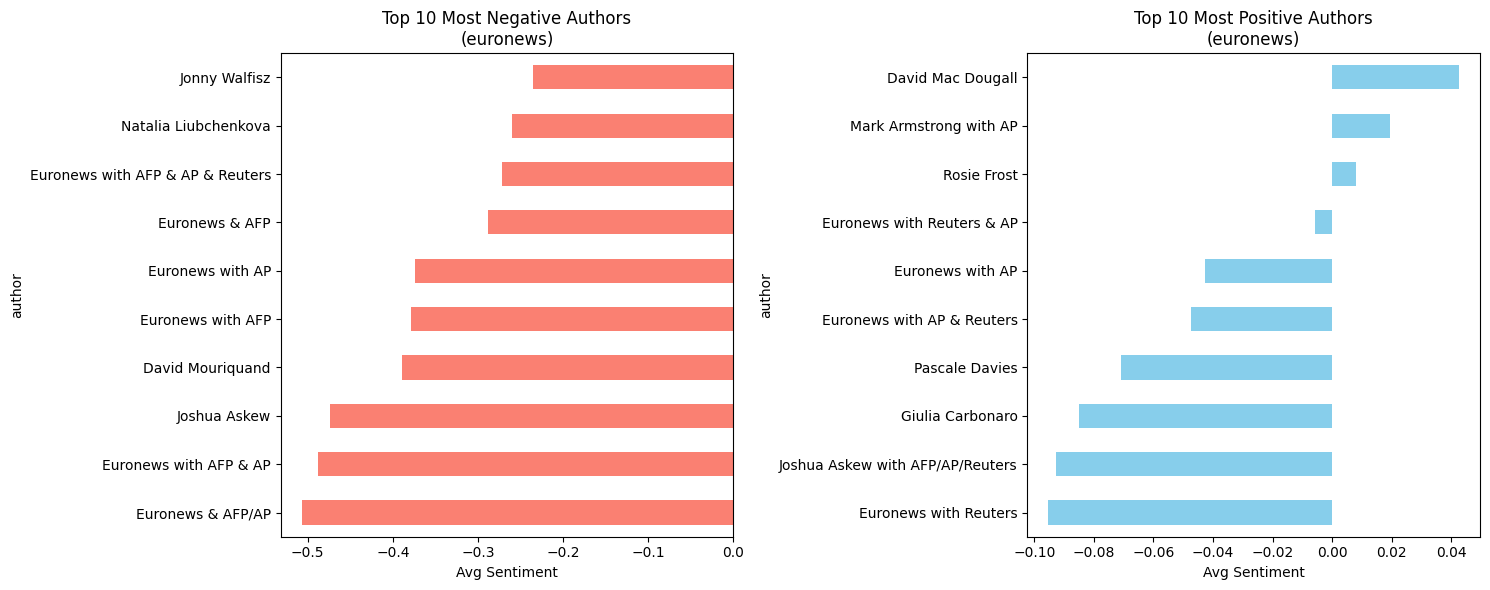

In [ ]:
# Q: Are some authors consistently more positive or negative in Euronews?

# Filter for site and minimum article count (to find consistency)
site_name = 'euronews'
site_df = df[df['siteName'] == site_name]

# Filter for authors with at least 3 articles
author_counts = site_df['author'].value_counts()
consistent_authors = author_counts[author_counts >= 3].index
filtered_df = site_df[site_df['author'].isin(consistent_authors)]

# Calculate average sentiment
author_sentiment = filtered_df.groupby('author')['sentiment'].mean().sort_values()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Most Negative
author_sentiment.head(10).plot(kind='barh', ax=ax1, color='salmon')
ax1.set_title(f'Top 10 Most Negative Authors\n({site_name})')
ax1.set_xlabel('Avg Sentiment')

# Most Positive
author_sentiment.tail(10).plot(kind='barh', ax=ax2, color='skyblue')
ax2.set_title(f'Top 10 Most Positive Authors\n({site_name})')
ax2.set_xlabel('Avg Sentiment')

plt.tight_layout()
plt.show()

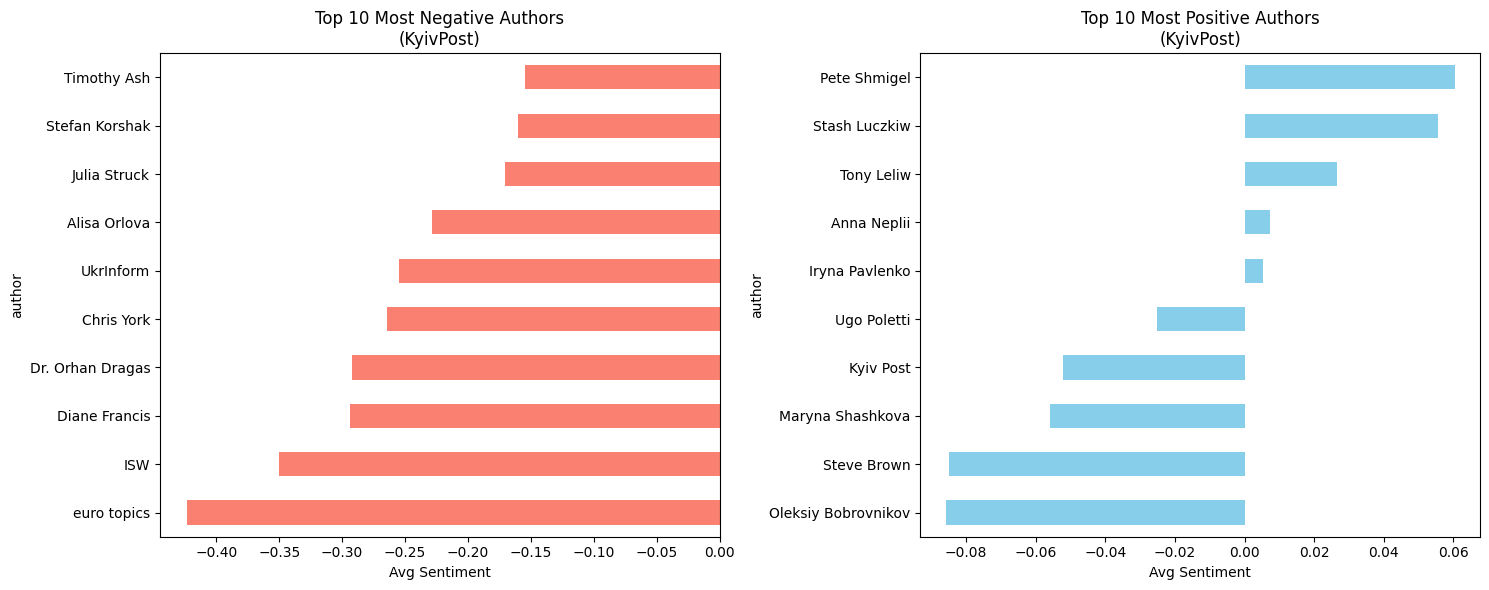

In [ ]:
# Q: Are some authors consistently more positive or negative in KyivPost?

# Filter for site and minimum article count (to find consistency)
site_name = 'KyivPost'
site_df = df[df['siteName'] == site_name]

# Filter for authors with at least 3 articles
author_counts = site_df['author'].value_counts()
consistent_authors = author_counts[author_counts >= 3].index
filtered_df = site_df[site_df['author'].isin(consistent_authors)]

# Calculate average sentiment
author_sentiment = filtered_df.groupby('author')['sentiment'].mean().sort_values()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Most Negative
author_sentiment.head(10).plot(kind='barh', ax=ax1, color='salmon')
ax1.set_title(f'Top 10 Most Negative Authors\n({site_name})')
ax1.set_xlabel('Avg Sentiment')

# Most Positive
author_sentiment.tail(10).plot(kind='barh', ax=ax2, color='skyblue')
ax2.set_title(f'Top 10 Most Positive Authors\n({site_name})')
ax2.set_xlabel('Avg Sentiment')

plt.tight_layout()
plt.show()

Word cloud saved successfully to: ../visuals/wordcloud_comparison.png


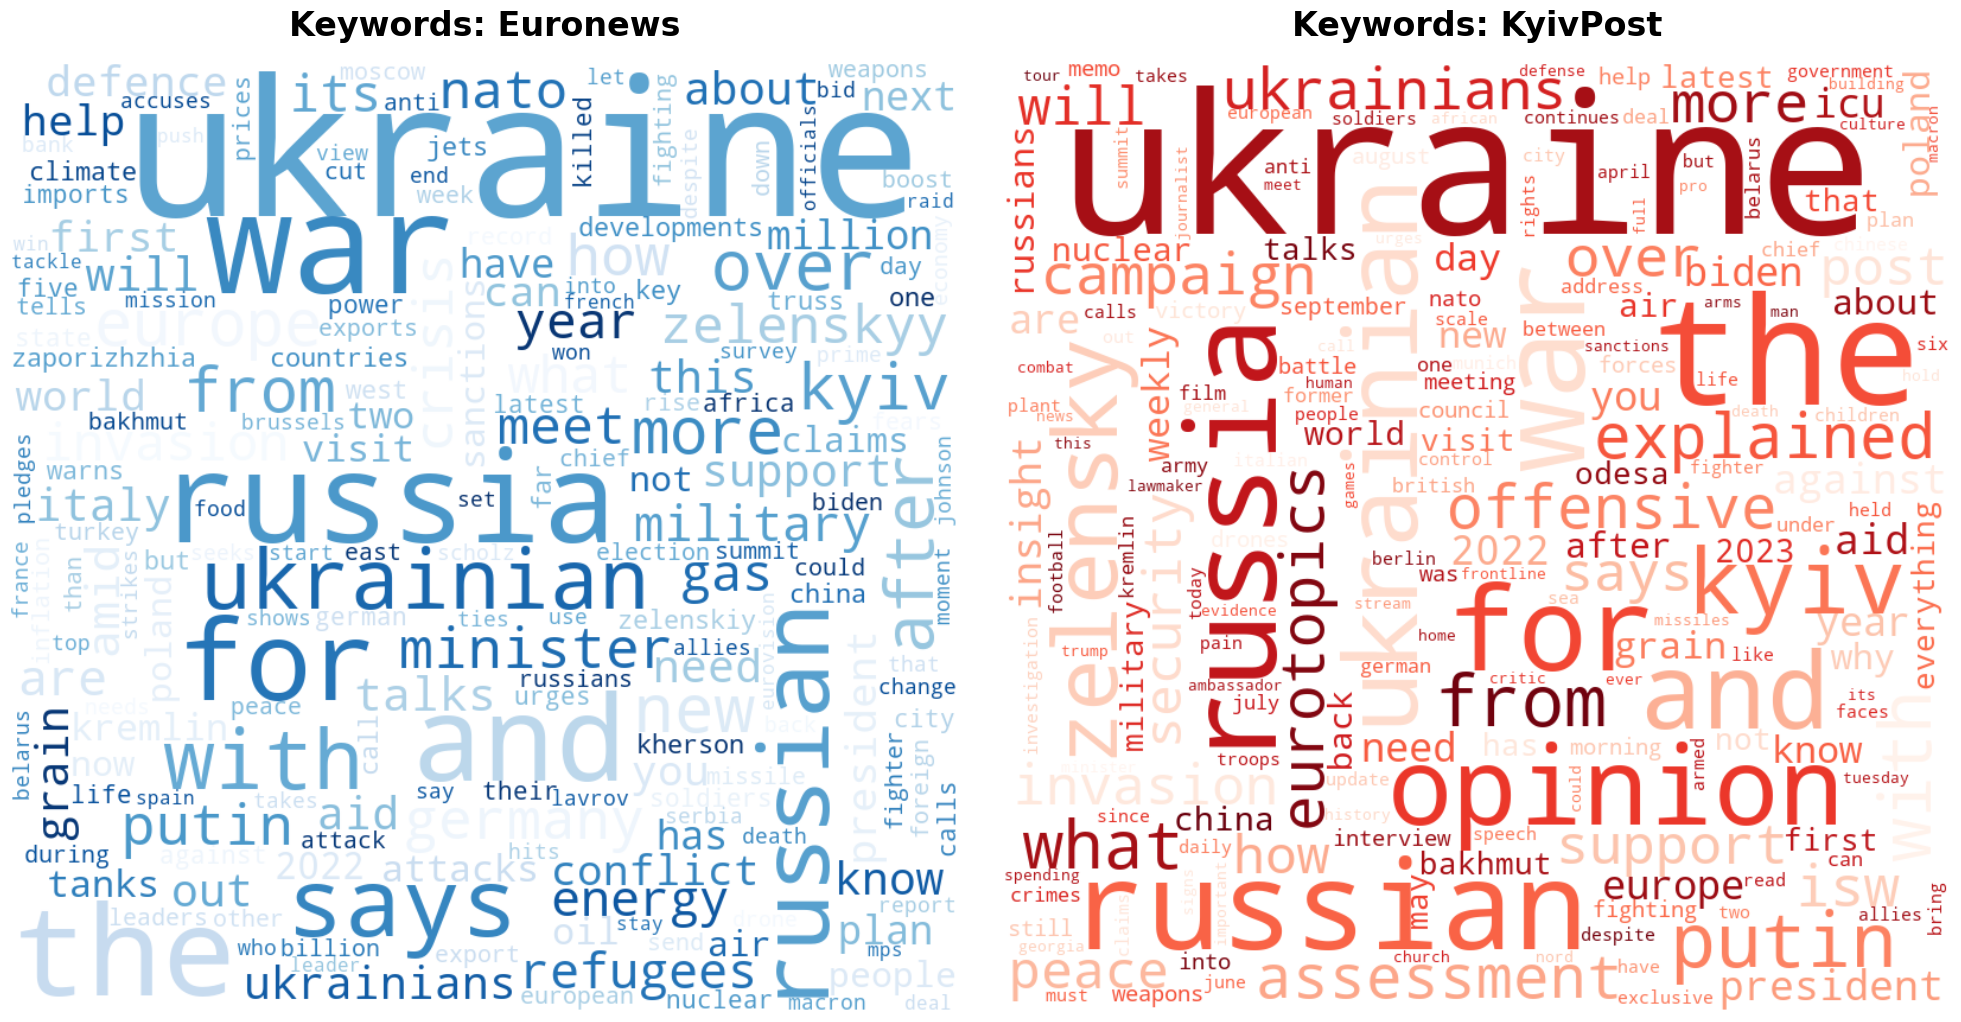

In [ ]:
# Q: What are the most common words in titles?
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
import os

# 1. Helper function to process titles for a specific site
def get_site_word_freq(site_name):
    # Filter by site and apply your cleaning logic
    titles = df[df['siteName'] == site_name]['title'].dropna().str.lower()
    title_words = titles.apply(lambda x: re.findall(r'\b\w{3,}\b', x))
    flat_words = [word for sublist in title_words for word in sublist]
    return Counter(flat_words)

# 2. Generate frequencies for both sites
euronews_freq = get_site_word_freq('euronews')
kyivpost_freq = get_site_word_freq('KyivPost')

# 3. Create the side-by-side plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Euronews Word Cloud
wc_euro = WordCloud(width=800, height=800, background_color='white', colormap='Blues').generate_from_frequencies(euronews_freq)
ax1.imshow(wc_euro, interpolation='bilinear')
ax1.set_title('Keywords: Euronews', fontsize=24, fontweight='bold', pad=20)
ax1.axis('off')

# KyivPost Word Cloud
wc_kyiv = WordCloud(width=800, height=800, background_color='white', colormap='Reds').generate_from_frequencies(kyivpost_freq)
ax2.imshow(wc_kyiv, interpolation='bilinear')
ax2.set_title('Keywords: KyivPost', fontsize=24, fontweight='bold', pad=20)
ax2.axis('off')

plt.tight_layout()
plt.show()
